# Instructions

**Using Python (Jupyter Notebook enviroment - JupyterLab), solve the following problems.**

**Considering** that the mass of the Earth is $M=5.974 \times 10^{24}Kg$, it has a Radium of $R=6378.144$ Km, and the average solar year has a period of 365.2422 days (solar days).

**Considering that "LUME 1"** ($4^{th}$ UVIGO satellite) has the following **TLE Elements** given by Celestrack (Updated TLE elements can be found in this [link](http://www.celestrak.com/NORAD/elements/cubesat.txt))

**LUME 1 (16/10/2022)** 

1 43908U 18111AJ  22288.67576058  .00019219  00000+0  60526-3 0  9995 

2 43908  97.1712 172.7449 0017798  11.9132 348.2528 15.32802226211799             

[TLE Definition Link](http://celestrak.com/columns/v04n03/#FAQ01})

<img src="https://www.dropbox.com/s/7ye4vgyf45xlu23/TLE_Line_1.png?raw=1 " width="600" class="center" />

<img src="https://www.dropbox.com/s/x2a7z7u5ss6yb0s/TLE_Line_2.png?raw=1 " width="600" class="center" />

### True Anomaly, Eccentric Anomaly and Mean Anomaly


* **True anomaly** is the actual measured angle in the orbital plane between the vector extending from the focus to the point of periapsis and the vector extending from the focus to the object's actual position.

* **Mean anomaly** is the angle between the periapsis point and the imagined position of an object for the same elapsed time since periapsis for a circular orbit around the same body with the same orbital period.

* The key difference is that ***the mean anomaly always increases linearly with time***. The true anomaly, in general, does not, except if *the orbit is circular, in which case the mean anomaly and true anomaly are identical* (well, not really, because circular orbits don't have a periapsis, but in the limiting case, this is true).

* The two are related through the eccentric anomaly: let $M$ be the mean anomaly, $E$ be the eccentric anomaly, $e$ be the eccentricity, and $\theta$ be the true anomaly.
  * $M=E-e \sin E$  (Kepler's Equation)
  * $\cos \theta =\frac{ \cos E - e}{1 - e \cos E}$
  * $\tan\frac{\theta}{2} = \sqrt \frac{1+e}{1-e}\tan \frac{E}{2}$


### Compute

1. Plot the velocity vs the height of LUME-1 during one orbit.
2. Assuming that LUME-1 has an ommidirectional antenna pattern, compute and plot the the theoretial (maximum) footprint.
3. Plot a simplified Ground Track of LUME-1 over the next three orbits, transforming the Perifocal Coordiantes (r,$\theta$) to the Earth-Center-Earth-Reference Coordinates, with the following considerations:
  * Install GeoPandas, earthpi, descartes
    * pip install geopandas
    * pip install earthpi
    * pip install descartes
  * Plot the Worl Map using the example provided in the following [link](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/)
  * Position of the Greenwich Meridian at t = 0, $\Omega = 0$
  * Since the orbit is almost circular, consider an equivalent LUME-1 circular orbit approximation orbiting with the height and velocity in the perigee of the actual LUME-1 satellite.
   * Do not consider any secular effect in the argument of perigee nor in the right ascesion of the acending node due to the Moon, Sun or nonspheriity of the Earth.  
4.  Using [Skyfield](https://rhodesmill.org/skyfield/earth-satellites.html) compute the Ground Track considering the same conditions than in the previous point, starting on 30/10/2020 at 0:00 with a duration of 30000 seconds
  * Install the skyfield library (pip install skyfield)
  * For defining the time period use the following commands
    * ts = load.timescale()
    * t = ts.utc(2020,10,30,0,0,range(0,30000))
    
### Deliverables

1.  Jupyter Notebook file: **practice2_name_student.ipynb file**, including the source code.

2.  **Write an individual report (PDF format) including and explaining the results of
    the computation and the plots of the figures.**

In [ ]:
!pip install matplotlib pandas numpy shapely earthpy seaborn geopandas descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from math import acos
from math import asin
import pandas as pd
import geopandas as gpd
import numpy as np
from numpy import linalg as LA
from shapely.geometry import Point
import earthpy as et 
import seaborn as sns
import geopandas as gpd

In [ ]:
mu = 3.986e14 # mu earth_constant in m^3/sec^2
TLE_1=("1", "43908U", "18111AJ",  "22288.67576058",  ".00019219",  "00000+0",  "60526-3", "0",  "9995")
TLE_2=("2", "43908",  "97.1712", "172.7449", "0017798",  "11.9132", "348.2528", "15.32802226211799")

### Part 1

1. **Plot the velocity vs the height of LUME-1 during one orbit.**

The first thing we need to compute is the semi major axis:

$n_0=\sqrt{\frac{\mu}{a^3}}$

Then

$a=\frac{\mu}{n_0^2}^{1/3}$

With this information and the eccentricity we can compute the radius of the perigee and the apogee:

$r_a = a(1+e)$ \
$r_p = a(1-e)$

Then

$v\left(r_{P}\right)=v_{0}=\sqrt{\mu\left(\frac{2}{r_{P}}-\frac{1}{a}\right)}$

With this, we can compute $h=r_p v_0$. And with $h$, we know that $p=\frac{h^2}{\mu}$. We have to compute the values for a period, then $\theta =(0,2\pi)$



In [ ]:
G = 6.67*10**-11 #constante de gravitacion
M = 5.974*10**24 #masa de la tierra
i = float(TLE_2[2])  #inclinacion en degrees
raan = float (TLE_2[3])
e = float("0." + TLE_2[4]) #excentricidad
ap = float(TLE_2[5]) #argumento del perigeo
ma = float(TLE_2[6]) #mean anomaly = true anomaly
no = float(TLE_2[7][0:10])*(2*np.pi/(3600*24))  #mean motion en rad/s
 
earth_radius = 6378144 #metros
a = (mu/(no*no))**(0.3333)
rp = a * (1-e) #distancia perigeo
ra= a* (1+e) #distancia apogeo

velocity = (mu*((2/ra)-(1/a)))**0.5
print (f'Velocidad: {velocity /1000:.3f} Km/s')
height=  mu/(velocity*velocity) 
altura = (height-earth_radius)
print ((f'Altura: {altura /1000:.3f} Km'))

v = np.array([velocity*0.95, velocity])
h =np.array([altura/0.95, altura]) #altura

h0 =rp*velocity
p = (h0*h0)/mu #momento angular 

Velocidad: 7.623 Km/s
Altura: 481.054 Km


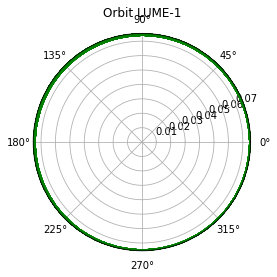

In [ ]:
ax = plt.subplot(111, projection='polar')
plt.title('Orbit LUME-1')
theta = np.linspace(0, ma, 10000)

r = np.linspace(altura*0.999, altura, 10000)
ax.plot(theta, r/earth_radius, 'g.')
plt.show()

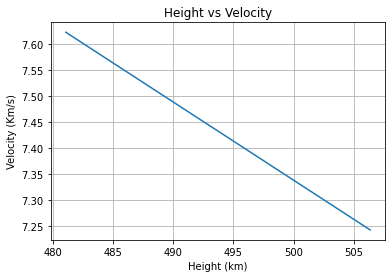

In [ ]:
ax = plt.subplot(111)
ax.plot(h/1000, v/1000 )
plt.grid(True)
plt.xlabel ('Height (km)')
plt.ylabel('Velocity (Km/s)')
plt.title ('Height vs Velocity')
plt.show()

### Part 2

2. **Plot the maximum theoretical footprint during one orbit**

<img src="https://www.dropbox.com/s/z6s47eq16muck9s/visible_latitude.png?raw=1 " width="800" class="center" />

In [ ]:
#calculamos fi
fi = (acos(earth_radius/height)) #calculamos la mitad del angulo que se ve
footprint = 2*fi*earth_radius/1000 #el footprint es el angulo total que se ve por el radio de la tierra

print((f'Footprint: {footprint:.3f} Km'))

Footprint: 4805.857 Km


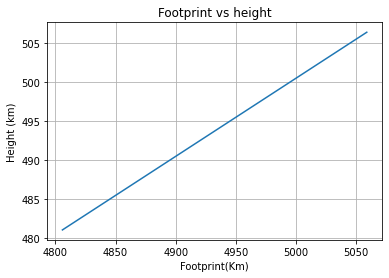

In [ ]:
f = np.array([footprint/0.95, footprint])
ax = plt.subplot(111)
ax.plot(f, h/1000 )
plt.grid(True)
plt.ylabel ('Height (km)')
plt.xlabel('Footprint(Km)')
plt.title ('Footprint vs height')
plt.show()

### Part 3
3. Plot a simplified Ground Track of LUME-1 over the next three orbits, transforming the Perifocal Coordiantes (r,$\theta$) to the Earth-Center-Earth-Reference Coordinates, with the following considerations:
  * Install GeoPandas, earthpi, descartes
    * pip install geopandas
    * pip install earthpi
    * pip install descartes
  * Plot the Worl Map using the example provided in the following [link](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/)
  * Position of the Greenwich Meridian at t = 0, $\Omega = 0$
  * Since the orbit is almost circular, consider an equivalent LUME-1 circular orbit approximation orbiting with the height and velocity in the perigee of the actual LUME-1 satellite.
   * Do not consider any secular effect in the argument of perigee nor in the right ascesion of the acending node due to the Moon, Sun or nonspheriity of the Earth.  

### Resolution Part 3

In this [link](https://en.wikipedia.org/wiki/Rotation_matrix), you can find a reference of the basics of rotation matrices.

<img src="https://www.dropbox.com/s/3jiscbsknwb211w/transformation_of_coordinates.png?raw=1 " width="500" class="center" />


To transform the coordinates from the periphocal system to the Earth Coordinate we need 4 rotations

1. Known the true anomaly $\theta$ and the distance $r$, compute the position of the satellite in the perifocal coordinate system in the orbital plane

2. Turn an angle ω around the $Z_p$ axis
  * Perpendicular to orbital plane
  * The new $X_n$ will be placed in the node line

<img src="https://www.dropbox.com/s/y0xtpfn7w295t4r/step_1.png?raw=1 " width="600" class="center" />

3. Turn around this axix $X_n$ an angle $i$.
  * We place the plane $X_nY_n$ in the equatorial plane
  
<img src="https://www.dropbox.com/s/oc8fafgg645scsy/step_2.png?raw=1 " width="500" class="center" />


4. The last turn with angle $\Omega$ transform finally the coordinates to the absolute coordinate system (Vernal)  

  
<img src="https://www.dropbox.com/s/7n1xzpygx7gaatp/step_3.png?raw=1 " width="500" class="center" />
  

5. An additional turn allows us to define the coordinates in the rotational coordinate system

<img src="https://www.dropbox.com/s/8xhzhushvm2mac5/step_4.png?raw=1 " width="500" class="center" />

6. To compute the longitude and latitude use the followig algorithm

<img src="https://www.dropbox.com/s/kamq5j9ieley3cg/computing_raan_delta.png?raw=1 " width="800" class="center" />



1- Known the true anomaly  θ  and the distance  r , compute the position of the satellite in the perifocal coordinate system in the orbital plane

In [84]:
## como tenemos una orbita circular true anomaly= mean anomaly = eccentric anomaly
ta = (ma*np.pi)/180 #true anomaly
theta = np.linspace(ta, ta+6*np.pi, 2000) 
wrad = (ap * np.pi)/180 
omega = (3.01 * np.pi)/180
r =rp#orbita cirular entonces ra = rp
irad = (i*np.pi)/180
te= 23.9345 * 3600
omegae = 2*np.pi/te


2- Turn an angle ω around the  Zp  axis

In [85]:
xp = r* np.cos(theta)
yp = r* np.sin(theta)

#Primera matriz de rotacion
xn1= np.cos(wrad)
xn2= -np.sin(wrad)
yn1 = np.sin(wrad)
yn2 = np.cos(wrad)


3-Turn around this axix  Xn  an angle  i

In [86]:
#Segunda matriz de rotacion
yn11 = np.cos(irad)
yn22 = -np.sin(irad)
z1 = np.sin(irad)
z2 = np.cos(irad)

4-The last turn with angle  Ω  transform finally the coordinates to the absolute coordinate system 

In [87]:
#Tercera matriz de rotacion
x1= np.cos(omega)
x2 = -np.sin(omega)
y1 = np.sin(omega)
y2= np.cos(omega)

5-An additional turn allows us to define the coordinates in the rotational coordinate system 

In [88]:
#matriz del punto vernal
xr1 = np.cos(omegae*te)
xr2 = np.sin(omegae*te)
yr1 = -np.sin(omegae*te)
yr2 = np.cos(omegae*te)
#es 1 y 0 solo

6-To compute the longitude and latitude use the followig algorithm

In [89]:
Tearth= 86164.09053899306
vangearth= 2*np.pi / Tearth
print(f'vangular:{vangearth}')
#mostramos las matrices
#primera matriz de rotacion

print((f'First rotation matrix: {[xn1, xn2, 0]}'))
print(f'                       {[yn1, yn2,0]}')
print(f'                       {[0  , 0   ,1   ]}')

#Segunda matriz de rotacion
print((f'Second rotation matrix: {[1, 0, 0]}'))
print(f'                       {[0, yn11,yn22]}')
print(f'                       {[0  , z1   ,z2 ]}')

#Tercera matriz de rotacion

print((f'Third rotation matrix: {[x1, x2, 0]}'))
print(f'                       {[y1, y2,0]}')
print(f'                       {[0  , 0  ,1 ]}')


vangular:7.292115854615987e-05
First rotation matrix: [0.9784614531003049, -0.20642961220919814, 0]
                       [0.20642961220919814, 0.9784614531003049, 0]
                       [0, 0, 1]
Second rotation matrix: [1, 0, 0]
                       [0, -0.1248345265106929, -0.992177575331579]
                       [0, 0.992177575331579, -0.1248345265106929]
Third rotation matrix: [0.9986203851970865, -0.05251024917882802, 0]
                       [0.05251024917882802, 0.9986203851970865, 0]
                       [0, 0, 1]


In [111]:
#Hallamos XYZ
X= r*(np.cos(omega)*np.cos(wrad)-np.sin(omega)*np.sin(wrad)*np.cos(theta))
Y= r*(np.sin(omega)*np.cos(wrad)+np.cos(omega)*np.sin(wrad)*np.cos(theta))
Z= r*(np.sin(wrad)*np.sin(theta))
R= ((X*X)+(Y*Y)+(Z*Z))**0.5
dec= (np.sin(Z/R))**-1

alf=360-1/np.cos(Y/(R*np.cos(dec)))


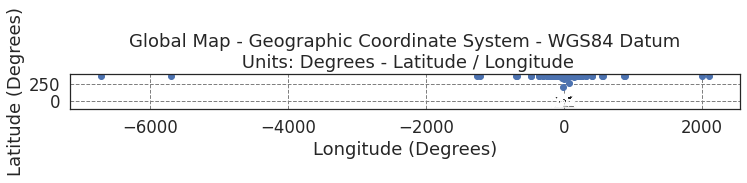

In [112]:
# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)


fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',ax=ax)

ax.scatter(dec, alf)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

### Part 4

4.  Using [Skyfield](https://rhodesmill.org/skyfield/earth-satellites.html) compute the Ground Track of "LUME 1" satellite considering the same conditions than in the previous point, starting on 30/10/2020 at 0:00 with a duration of 30000 seconds
  * Install the skyfield library (pip install skyfield)
  * For defining the time period use the following commands
    * ts = load.timescale()
    * t = ts.utc(2020,10,30,0,0,range(0,30000))

In [36]:
!pip install skyfield cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from skyfield.api import Topos, load, EarthSatellite
import cartopy.crs as ccrs
stations_url = 'http://www.celestrak.com/NORAD/elements/cubesat.txt'
satellites = load.tle_file(stations_url)
print('Loaded', len(satellites), 'satellites')

[#################################] 100% cubesat.txt


Loaded 149 satellites


In [38]:
#vector temporal
ts = load.timescale()
t = ts.utc (2022, 12, 1 , 0, 0, range(0,30000))

#poner los archivos correspondientes a lume1
by_name = {sat.name: sat for sat in satellites}
satellite = by_name['LUME 1']
print (satellite)

#obtenemos la posicion del satelite en la rotacion de la tierra
geocentric = satellite.at(t)
subpoint = geocentric.subpoint()
lat = subpoint.latitude.degrees
lon = subpoint.longitude.degrees

LUME 1 catalog #43908 epoch 2022-11-03 05:06:03 UTC


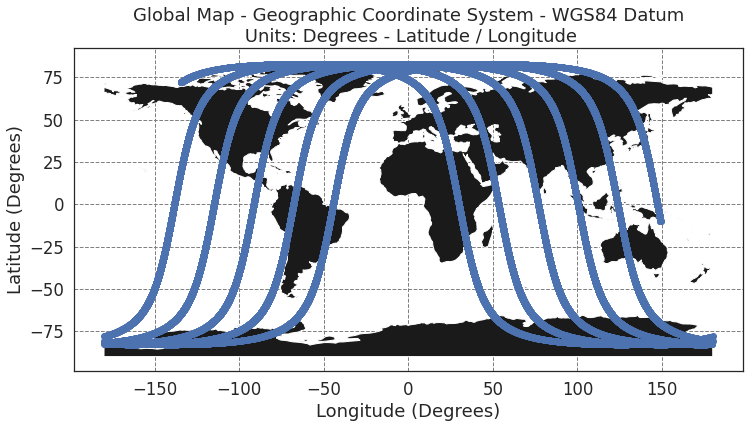

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k', ax=ax)

ax.scatter(lon,lat)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)", title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')